In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

### Define the neural network model


Using the Keras Sequential API we define a model with three fully connected layers. 
- The first layer has an input with size of $[\texttt{batch_size}, \texttt{d0}, \texttt{d1}]$. However, in the input shape argument we only need to specify $[\texttt{d0}, \texttt{d1}]$, if the input does not have a second dimension $\texttt{d1}$ then in the input shape argument we can write $(\texttt{d0}, )$.
- The first layer also has an activation function, which we can specify using the activation argument, common choices are ReLU, sigmoid, tanh and linear. 
- By simply adding another Dense object layer to the Sequential model we can build the second layer.

<img src="https://miro.medium.com/max/1400/1*ZB6H4HuF58VcMOWbdpcRxQ.png" alt="NN_Image" width="400">

In [75]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(1,)),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

In [76]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(
    optimizer='adam', # 'rmsprop', 'sgd'
    loss='mean_squared_error', # 'mae'
    metrics='mse'
)

### Generate random data

In this example we will try to fit the curve
$$f(x) = x\cos(x) + \sin^2(x)$$

In [69]:
X_train = tf.random.uniform(shape=[1000, ], minval=0, maxval=10)
Y_train = X_train * tf.cos(X_train) + tf.sin(X_train) ** 2 + 0.5*tf.random.normal(shape=[1000, ])

X_test = tf.random.uniform(shape=[500, ], minval=0, maxval=10)
Y_test = X_test * tf.cos(X_test) + tf.sin(X_test) ** 2 + 0.5*tf.random.normal(shape=[500, ])

Now we can visualize the data, note that since the data is not sorted we should use a scatter plot.

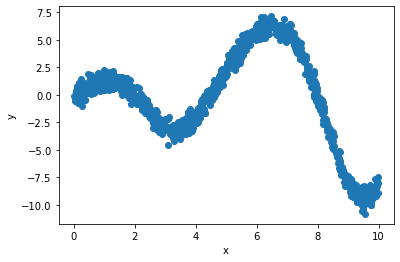

In [70]:
plt.figure()
plt.scatter(X_train.numpy(), Y_train.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Training

Using the generated data we can train the neural network model, we train it for 500 epochs (one epoch is one pass over the entire dataset) with a batch size of 64.

In [78]:
# training_history = model.fit(features, labels, epochs=epochs, batch_size=batch_size)
history = model.fit(X_train, Y_train, epochs=1000, batch_size=32)

Epoch 1/1000
32/32 [==============================] - 0s 1ms/step - loss: 18.9964 - mse: 18.9964
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 18.9377 - mse: 18.9377
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 18.8941 - mse: 18.8941
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 18.8551 - mse: 18.8551
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 18.8288 - mse: 18.8288
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 18.8076 - mse: 18.8076
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 18.7835 - mse: 18.7835
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 18.7555 - mse: 18.7555
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 18.7290 - mse: 18.7290
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 18.7071 - mse: 18.7071
Epoch 11/1000
32/32 [========

32/32 [==============================] - 0s 3ms/step - loss: 16.1631 - mse: 16.1631
Epoch 85/1000
32/32 [==============================] - 0s 4ms/step - loss: 16.0300 - mse: 16.0300
Epoch 86/1000
32/32 [==============================] - 0s 3ms/step - loss: 15.9164 - mse: 15.9164
Epoch 87/1000
32/32 [==============================] - 0s 4ms/step - loss: 15.7507 - mse: 15.7507
Epoch 88/1000
32/32 [==============================] - 0s 3ms/step - loss: 15.5767 - mse: 15.5767
Epoch 89/1000
32/32 [==============================] - 0s 4ms/step - loss: 15.3610 - mse: 15.3610
Epoch 90/1000
32/32 [==============================] - 0s 2ms/step - loss: 15.1292 - mse: 15.1292
Epoch 91/1000
32/32 [==============================] - 0s 2ms/step - loss: 14.8801 - mse: 14.8801
Epoch 92/1000
32/32 [==============================] - 0s 2ms/step - loss: 14.6258 - mse: 14.6258
Epoch 93/1000
32/32 [==============================] - 0s 1ms/step - loss: 14.3678 - mse: 14.3678
Epoch 94/1000
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 7.4886 - mse: 7.4886
Epoch 169/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4944 - mse: 7.4944
Epoch 170/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.5044 - mse: 7.5044
Epoch 171/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4850 - mse: 7.4850
Epoch 172/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.5000 - mse: 7.5000
Epoch 173/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4703 - mse: 7.4703
Epoch 174/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4695 - mse: 7.4695
Epoch 175/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4680 - mse: 7.4680
Epoch 176/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4615 - mse: 7.4615
Epoch 177/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4549 - mse: 7.4549
Epoch 178/1000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 7.4411 - mse: 7.4411
Epoch 253/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4308 - mse: 7.4308
Epoch 254/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4291 - mse: 7.4291
Epoch 255/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4489 - mse: 7.4489
Epoch 256/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4387 - mse: 7.4387
Epoch 257/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4317 - mse: 7.4317
Epoch 258/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4297 - mse: 7.4297
Epoch 259/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4420 - mse: 7.4420
Epoch 260/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4311 - mse: 7.4311
Epoch 261/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4307 - mse: 7.4307
Epoch 262/1000
32/32 [=======================

32/32 [==============================] - 0s 1ms/step - loss: 7.4290 - mse: 7.4290
Epoch 337/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4434 - mse: 7.4434
Epoch 338/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4330 - mse: 7.4330
Epoch 339/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4304 - mse: 7.4304
Epoch 340/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4459 - mse: 7.4459
Epoch 341/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4522 - mse: 7.4522
Epoch 342/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4502 - mse: 7.4502
Epoch 343/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4324 - mse: 7.4324
Epoch 344/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4370 - mse: 7.4370
Epoch 345/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4400 - mse: 7.4400
Epoch 346/1000
32/32 [=======================

32/32 [==============================] - 0s 1ms/step - loss: 7.4371 - mse: 7.4371
Epoch 421/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4315 - mse: 7.4315
Epoch 422/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4339 - mse: 7.4339
Epoch 423/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4411 - mse: 7.4411
Epoch 424/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4313 - mse: 7.4313
Epoch 425/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4414 - mse: 7.4414
Epoch 426/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4315 - mse: 7.4315
Epoch 427/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4337 - mse: 7.4337
Epoch 428/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4620 - mse: 7.4620
Epoch 429/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4314 - mse: 7.4314
Epoch 430/1000
32/32 [=======================

32/32 [==============================] - 0s 3ms/step - loss: 7.4409 - mse: 7.4409
Epoch 505/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.4320 - mse: 7.4320
Epoch 506/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.4321 - mse: 7.4321
Epoch 507/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.4398 - mse: 7.4398
Epoch 508/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.4679 - mse: 7.4679
Epoch 509/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.4351 - mse: 7.4351
Epoch 510/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.4331 - mse: 7.4331
Epoch 511/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.4369 - mse: 7.4369
Epoch 512/1000
32/32 [==============================] - 0s 4ms/step - loss: 7.4410 - mse: 7.4410
Epoch 513/1000
32/32 [==============================] - 0s 5ms/step - loss: 7.4471 - mse: 7.4471
Epoch 514/1000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 7.4294 - mse: 7.4294
Epoch 589/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4338 - mse: 7.4338
Epoch 590/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4339 - mse: 7.4339
Epoch 591/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4395 - mse: 7.4395
Epoch 592/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4804 - mse: 7.4804
Epoch 593/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4574 - mse: 7.4574
Epoch 594/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4549 - mse: 7.4549
Epoch 595/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4379 - mse: 7.4379
Epoch 596/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4368 - mse: 7.4368
Epoch 597/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4477 - mse: 7.4477
Epoch 598/1000
32/32 [=======================

32/32 [==============================] - 0s 2ms/step - loss: 7.4347 - mse: 7.4347
Epoch 673/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4377 - mse: 7.4377
Epoch 674/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4425 - mse: 7.4425
Epoch 675/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4297 - mse: 7.4297
Epoch 676/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4384 - mse: 7.4384
Epoch 677/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4345 - mse: 7.4345
Epoch 678/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4551 - mse: 7.4551
Epoch 679/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4316 - mse: 7.4316
Epoch 680/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4596 - mse: 7.4596
Epoch 681/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4430 - mse: 7.4430
Epoch 682/1000
32/32 [=======================

32/32 [==============================] - 0s 1ms/step - loss: 7.4276 - mse: 7.4276
Epoch 757/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4340 - mse: 7.4340
Epoch 758/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4321 - mse: 7.4321
Epoch 759/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4293 - mse: 7.4293
Epoch 760/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4476 - mse: 7.4476
Epoch 761/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4479 - mse: 7.4479
Epoch 762/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4377 - mse: 7.4377
Epoch 763/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4394 - mse: 7.4394
Epoch 764/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4676 - mse: 7.4676
Epoch 765/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4451 - mse: 7.4451
Epoch 766/1000
32/32 [=======================

32/32 [==============================] - 0s 5ms/step - loss: 7.4315 - mse: 7.4315
Epoch 841/1000
32/32 [==============================] - 0s 4ms/step - loss: 7.4528 - mse: 7.4528
Epoch 842/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4421 - mse: 7.4421
Epoch 843/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.4335 - mse: 7.4335
Epoch 844/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4329 - mse: 7.4329
Epoch 845/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4447 - mse: 7.4447
Epoch 846/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.4348 - mse: 7.4348
Epoch 847/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.4320 - mse: 7.4320
Epoch 848/1000
32/32 [==============================] - 0s 2ms/step - loss: 7.4381 - mse: 7.4381
Epoch 849/1000
32/32 [==============================] - 0s 3ms/step - loss: 7.4404 - mse: 7.4404
Epoch 850/1000
32/32 [=======================

32/32 [==============================] - 0s 1ms/step - loss: 7.4178 - mse: 7.4178
Epoch 925/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4736 - mse: 7.4736
Epoch 926/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4481 - mse: 7.4481
Epoch 927/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4310 - mse: 7.4310
Epoch 928/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4363 - mse: 7.4363
Epoch 929/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4257 - mse: 7.4257
Epoch 930/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4338 - mse: 7.4338
Epoch 931/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4325 - mse: 7.4325
Epoch 932/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4390 - mse: 7.4390
Epoch 933/1000
32/32 [==============================] - 0s 1ms/step - loss: 7.4402 - mse: 7.4402
Epoch 934/1000
32/32 [=======================

### Evaluate the performance of the model

Using the `model.predict()` method we can evaluate the performance of our model on the testing dataset and compare it with the corresponding ground truth data.

In [73]:
# prediction = model.predict(features)
y_hat = model.predict(X_test)

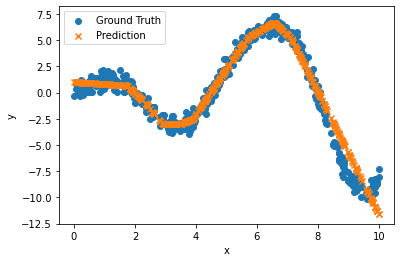

In [74]:
plt.figure()
plt.scatter(X_test.numpy(), Y_test.numpy(), label='Ground Truth')
plt.scatter(X_test.numpy(), y_hat, marker='x', label='Prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [51]:
loss_history = history.history['loss']

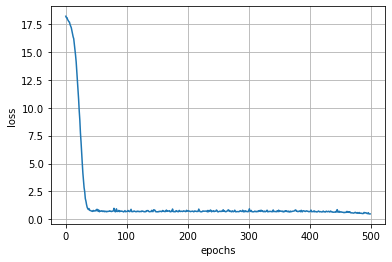

In [52]:
plt.figure()
plt.plot(loss_history)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

### Summary

We can see that using Keras' Sequential API we can build a functional neural network using very few lines of code.
```
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics='mse'
)

history = model.fit(X_train, Y_train, epochs=500, batch_size=32)
```

### Linear Activation

Here instead of using a nonlinear activation function (e.g. ReLU, Sigmoid...) we will a linear activation function and see that the output of the model is in the form of a line. 

In [57]:
model_linear = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

In [58]:
# Assign the weights of model to model_linear (check what zip does!)
for layer_model, layer_model_linear in zip(model.layers, model_linear.layers):
    layer_model_linear.set_weights(layer_model.get_weights())

In [59]:
# prediction = model.predict(features)
y_hat = model_linear.predict(X_test)

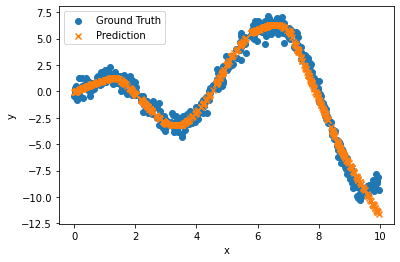

In [60]:
plt.figure()
plt.scatter(X_test.numpy(), Y_test.numpy(), label='Ground Truth')
plt.scatter(X_test.numpy(), y_hat, marker='x', label='Prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()